# Final Project


## Miller, et al



### The purpose of this analysis is to see if we can accurately predict used car sale prices. We also want to see which attributes of a car are the most important in determining the price of the vehicle. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [3]:
rand_state = 1000

In [4]:
df = pd.read_csv("cars.csv")

In [5]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Data preprocessing


First we had to fix a couple of variables. As can be seen, the Mileage variable has km on it, so we got rid of that and made it numeric. The variable Levy had "-" for some of it's observations. Levy is used by the IRS when taxes are not payed on a vehicle. The Levy is basically the starting bid at police auctions, so for all the "-" observations, we changed those to 0, becuase there is no Levy for them.

In [6]:
df["Levy"] = np.where(df["Levy"] == "-", 0, df["Levy"])
df["Mileage"] = df["Mileage"].str.replace('km','')

In [7]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

We need to change the type of categorical variables first,


In [9]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [10]:
numeric = ["Price", "Levy", "Mileage"]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

categorical = ["Manufacturer", "Model", "Prod. year", "Category", 
"Leather interior", "Fuel type", "Gear box type", "Drive wheels", "Doors", "Wheel", "Color", 
"Airbags", "Cylinders", "Engine volume"]

for col in categorical: 
    df[col] = df[col].astype("category")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                19237 non-null  int64   
 1   Price             19237 non-null  int64   
 2   Levy              19237 non-null  int64   
 3   Manufacturer      19237 non-null  category
 4   Model             19237 non-null  category
 5   Prod. year        19237 non-null  category
 6   Category          19237 non-null  category
 7   Leather interior  19237 non-null  category
 8   Fuel type         19237 non-null  category
 9   Engine volume     19237 non-null  category
 10  Mileage           19237 non-null  int64   
 11  Cylinders         19237 non-null  category
 12  Gear box type     19237 non-null  category
 13  Drive wheels      19237 non-null  category
 14  Doors             19237 non-null  category
 15  Wheel             19237 non-null  category
 16  Color             1923

Next we need to drop the ID variable because it's irrelevant to our analysis.

In [12]:
df.drop('ID',axis=1, inplace=True)

Next we check if there are any NA's, as can be seen, there are not any.

In [13]:
df.isna().sum()  

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

We checked the distribution of our target variable Price. As can be seen, there are a few outliers that need to be taken care of. Price is also very right skewed.

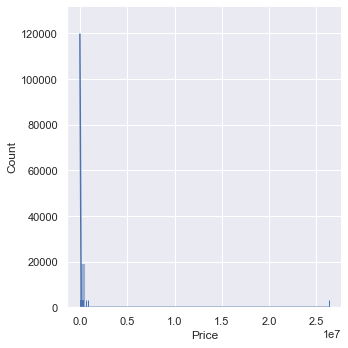

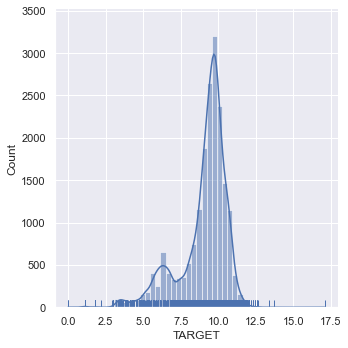

In [14]:
target = np.log(df['Price']) 
df['TARGET'] = target

# distribution plot of sale price
sns.displot(df['Price'], kde=True, bins=50, rug=True)
plt.show()

# distribution plot of the log of sale price
sns.displot(df['TARGET'], kde=True, bins=50, rug=True)
plt.show()

We dropped the outliers from price and did a log transformation to make it more normal. We will use this trasformed variable for our entire anaylsis and drop price from the dataframe. We also dropped the variable Model from the dataframe because its a categorical variable but has a lot of unique observations, making it computationally difficult to use. This isn't a problem for machine learning, however, it is a problem for our laptops.

In [15]:
df.drop('Model',axis=1, inplace=True)
df = df.drop([16983,8541,1225], axis = 0)

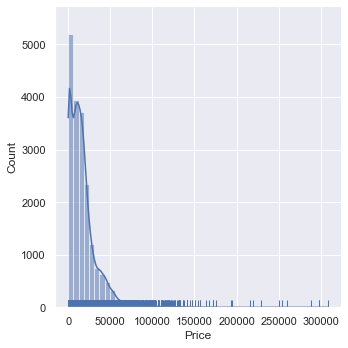

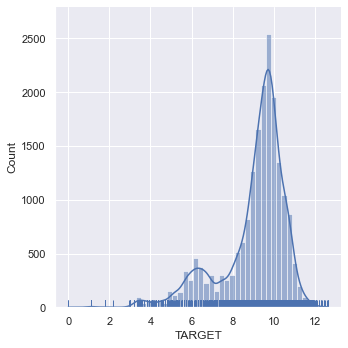

In [16]:
target = np.log(df['Price']) 
df['TARGET'] = target

# distribution plot of sale price
sns.displot(df['Price'], kde=True, bins=50, rug=True)
plt.show()

# distribution plot of the log of sale price
sns.displot(df['TARGET'], kde=True, bins=50, rug=True)
plt.show()

### EDA

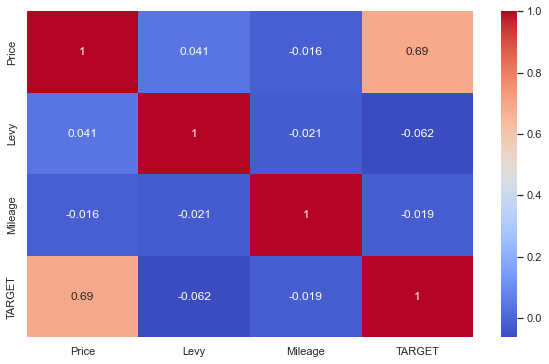

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

This is a heat map for the numeric variables. As can be seen, there is no strong correlation. The only strong correlation is price and target, which is just the tranformed version of price, so it makes sense that there's correlation there.

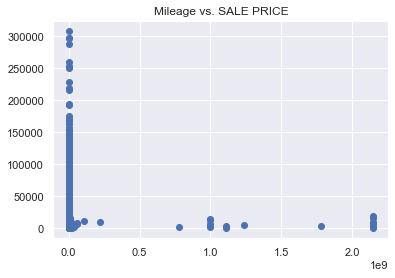

In [18]:
plt.scatter(x='Mileage', y = 'Price', data = df)
plt.title('Mileage vs. SALE PRICE')
plt.show()

This above plot shows Mileage compared to sale price. As cna be seen, most of our observations have low or no mileage, these observations vary greatly in their price. The cars with higher mileage tend to sell at lower prices. 

<AxesSubplot:>

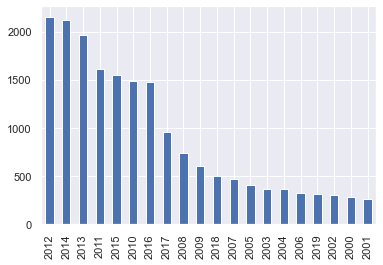

In [19]:
df['Prod. year'].value_counts().head(20).plot.bar()

The above plot shows the production year for the cars in our dataset. Note that this plot only shows the top 20 counts. As can be seen, most of the cars in this dataset were built in years from 2010 on. Studies have shown that most people only own cars for about 8-10 years, we see that pattern in this dataset.

<AxesSubplot:>

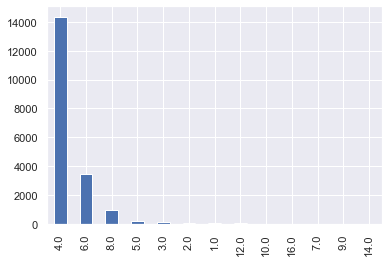

In [20]:
df['Cylinders'].value_counts().plot.bar()

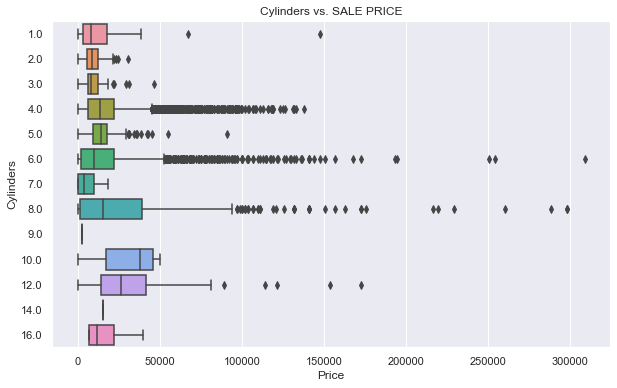

In [21]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Price', y = 'Cylinders', data = df)
plt.title('Cylinders vs. SALE PRICE')
plt.show()

The above 2 plots show  the count for the number of cylinders for cars and boxplots for each cylinder type compared to price. As can be seen in the top plot, most of the cars in the dataset have 4, 6 or 8 cylinders. This is the most common cylinder amount. The boxplots are all right skewed, except for 10 cylinders. This makes sense, prices are often right skewed. We see that most of the higher priced cars are cars with 6 or 8 cylinders.

<AxesSubplot:>

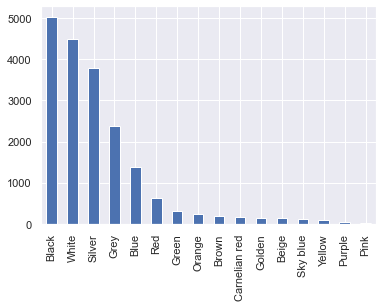

In [22]:
df['Color'].value_counts().plot.bar()

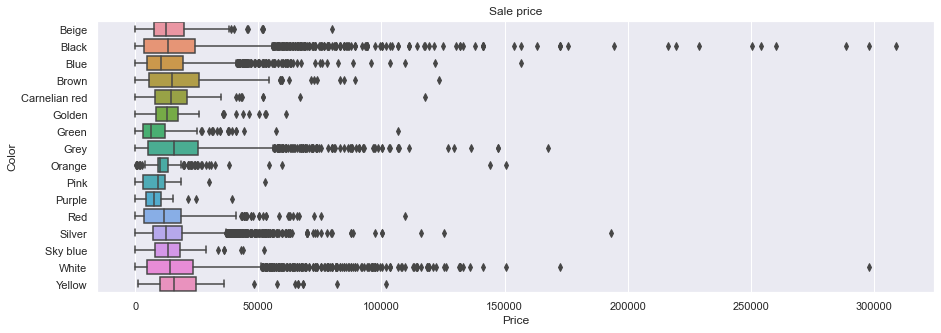

In [23]:
plt.figure(figsize = (15,5))

ax = sns.boxplot(x = 'Price', y = 'Color', data = df)
ax.set_xlabel('Price')
ax.set_ylabel('Color')
plt.title('Sale price')
plt.show()

The top 2 plots show count for color and boxplots for color vs price. As can be seen, most of the cars are black, white, gray, and silver. The boxplots again show right skewing. We also see that most of the higher priced cars are black and white cars. This is likely because there are significantly more of these colored cars in the dataset.

<AxesSubplot:>

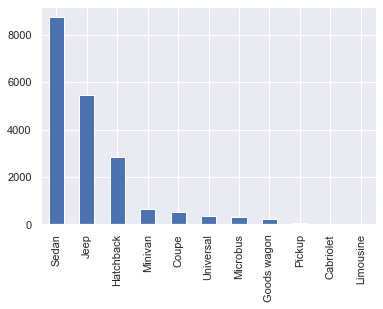

In [24]:
df['Category'].value_counts().plot.bar()

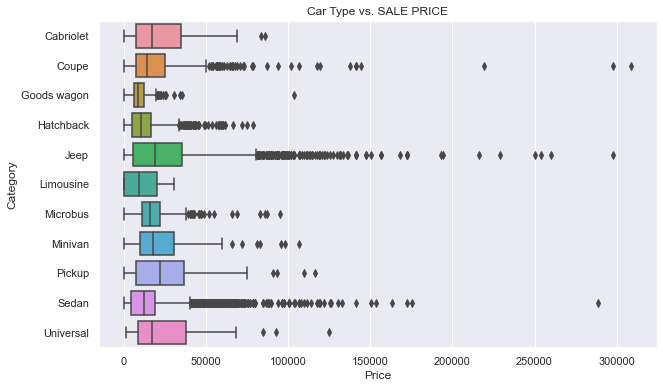

In [25]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Price', y = 'Category', data = df)
plt.title('Car Type vs. SALE PRICE')
plt.show()

The above 2 plots show the variable category. This cariable represents the type of car for each observation. As can be seen, most of the observations are sedans, jeeps, and hatchbacks. The boxplots show the same thing we see before, all are rightskewed. Most of the higher priced vars are Jeeps, coupes, and Sedans.

<AxesSubplot:>

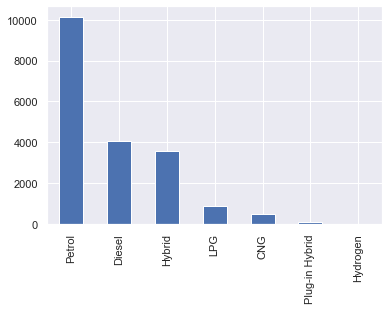

In [26]:
df['Fuel type'].value_counts().plot.bar()

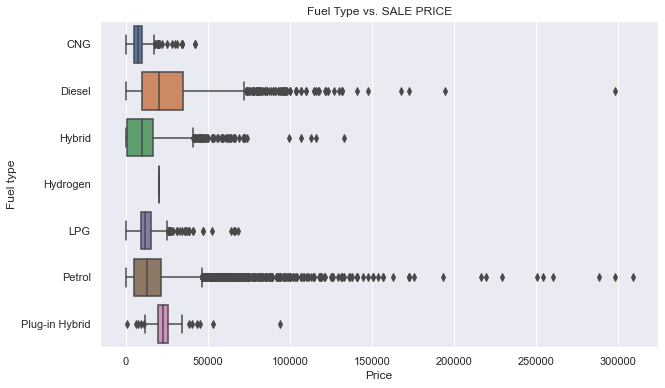

In [27]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Price', y = 'Fuel type', data = df)
plt.title('Fuel Type vs. SALE PRICE')
plt.show()

The top two plots show fuel types for each observation. As can be seen, the most common is petrol. The boxplots are again right skewed, diesel and petrol have observations that are priced higher.

<AxesSubplot:xlabel='Category', ylabel='count'>

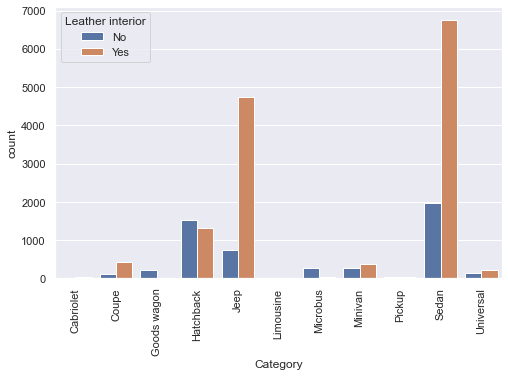

In [28]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.countplot('Category',hue='Leather interior',data=df)

The above plot shows each vehicle type and if it has leather interior or not. As can be seen, most types of cars have leather interior, the only one that doesnt is Goods Wagon and Hatchback.

### Last Cleaning

The following lines make a new dataframe to use for our tree based methods, drop price, and makes the categorical variables dummies.

In [29]:
df_tree = df

In [30]:
df_tree.drop('Price',axis=1, inplace=True)
df_tree.head()

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,TARGET
0,1399,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,9.497622
1,1018,CHEVROLET,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,9.718422
2,0,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,9.043932
3,862,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,8.190632
4,446,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,9.369564


In [31]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Levy,Mileage,TARGET,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,...,Airbags_7,Airbags_8,Airbags_9,Airbags_10,Airbags_11,Airbags_12,Airbags_13,Airbags_14,Airbags_15,Airbags_16
0,1399,186005,9.497622,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1018,192000,9.718422,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,200000,9.043932,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,862,168966,8.190632,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,446,91901,9.369564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Scaling the Features

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_temp = df[["Levy", "Mileage"]]
df_sc = df
df_sc_temp = scaler.fit_transform(df_temp)
df_sc_temp = pd.DataFrame(df_sc_temp, columns=df_temp.columns)

df_sc["Levy"] = df_sc_temp["Levy"]
df_sc["Mileage"] = df_sc_temp["Mileage"]

df_sc.head()

,Levy,Mileage,TARGET,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,...,Airbags_7,Airbags_8,Airbags_9,Airbags_10,Airbags_11,Airbags_12,Airbags_13,Airbags_14,Airbags_15,Airbags_16
0,1.350339,-0.027816,9.497622,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.679116,-0.027692,9.718422,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-1.114336,-0.027527,9.043932,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.404285,-0.028168,8.190632,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.328600,-0.029760,9.369564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_sc.isna().sum() 
df_sc = df_sc.dropna()

### Linear Regression

In [35]:
y = df_sc['TARGET']
X = df_sc.drop('TARGET', axis=1) # be careful inplace= False

# This is what we used to split it.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

# checking the percentage of training set!
np.round(len(X_train)/len(X),3)

0.8

In [61]:
from sklearn.linear_model import LinearRegression  # (For machine learning approach we use sklearn package)
import statsmodels.api as sm # (For econometrics approach we use statsmodels package)

reg_model = LinearRegression( )
reg_model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_hat_test = reg_model.predict(X_test)

In [63]:
log_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_test':y_hat_test, 'resid': y_test - y_hat_test})
log_predictions.head()

,y_test,y_hat_test,resid
13503,10.353320,9.464928,0.888392
2023,5.971262,8.579347,-2.608085
13868,9.808572,9.931481,-0.122908
3835,9.907031,9.120671,0.786361
4182,9.660205,9.154329,0.505876


In [64]:
MSE_test = np.mean(np.square(log_predictions['resid']))
np.round(MSE_test,3)
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

1.511

5-fold Cross Validated RMSE for Linear Regression 

In [65]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

my_estimator = LinearRegression()


MSE_five = -cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")
RMSE_five = np.sqrt(MSE_five)
RMSE_CV5 = np.mean(RMSE_five)
np.round(RMSE_CV5,3)


1.478

R-Squared for Linear Regression: .359

In [41]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

X_train_wc = sm.add_constant(X_train)
X_test_wc = sm.add_constant(X_test)

sm.OLS(y_test, X_test).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     8.584
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          8.37e-212
Time:                        11:27:54   Log-Likelihood:                -6407.7
No. Observations:                3847   AIC:                         1.329e+04
Df Residuals:                    3610   BIC:                         1.477e+04
Df Model:                         236                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Levy                           0.0383      0.022      1.742      0.082      -0.005       0.081
Mileage                        0.0217      0.028      0.760      0.447      -0.034       0.078
Manufacturer_ALFA ROMEO     6.374e-13   7.14e-13      0.892      0.372   -7.63e-13    2.04e-12
Manufacturer_ASTON MARTIN  -8.045e-13   8.78e-13     -0.916      0.360   -2.53e-12    9.17e-13
Manufacturer_AUDI              1.8818      1.353      1.391      0.164      -0.771       4.534
Manufacturer_BENTLEY           3.0997      1.161      2.670      0.008       0.823       5.376
Manufacturer_BMW               2.7799      1.341      2.072      0.038       0.150       5.410
Manufacturer_BUICK             2.6725      1.636      1.634      0.102      -0.535       5.880
Manufacturer_CADILLAC          3.7544      1.526      2.460      0.014       0.762       6.747
Manufacturer_CHEVROLET         2.1767      1.336      1.630      0.103      -0.442       4.795
Manufacturer_CHRYSLER          2.9612      1.457      2.033      0.042       0.105       5.817
Manufacturer_CITROEN           2.6657      1.551      1.719      0.086      -0.375       5.706
Manufacturer_DAEWOO            1.7455      1.382      1.263      0.207      -0.964       4.455
Manufacturer_DAIHATSU          4.3715      1.568      2.788      0.005       1.297       7.446
Manufacturer_DODGE             1.9834      1.368      1.449      0.147      -0.700       4.666
Manufacturer_FERRARI           6.3825      2.071      3.082      0.002       2.323      10.443
Manufacturer_FIAT              1.9663      1.378      1.427      0.154      -0.735       4.668
Manufacturer_FORD              2.2667      1.337      1.695      0.090      -0.354       4.888
Manufacturer_GAZ               2.4958      1.646      1.516      0.129      -0.731       5.723
Manufacturer_GMC               2.4756      1.465      1.690      0.091      -0.397       5.348
Manufacturer_GREATWALL     -3.491e-14   7.11e-14     -0.491      0.624   -1.74e-13    1.05e-13
Manufacturer_HAVAL          4.098e-13   4.51e-13      0.908      0.364   -4.75e-13    1.29e-12
Manufacturer_HONDA             2.1973      1.336      1.644      0.100      -0.422       4.817
Manufacturer_HUMMER            4.2570      1.951      2.182      0.029       0.431       8.083
Manufacturer_HYUNDAI           2.3812      1.331      1.788      0.074      -0.229       4.992
Manufacturer_INFINITI          3.1999      1.447      2.211      0.027       0.363       6.037
Manufacturer_ISUZU             2.4871      1.913      1.300      0.194      -1.263       6.237
Manufacturer_JAGUAR            2.0930      1.380      1.517      0.129      -0.612       4.798
Manufacturer_JEEP              2.8943      1.359      2.130      0.033       0.230       5.558
Manufacturer_KIA               2.1138      

Regularization


We need to find the optimal alphas for each method. The following code does that, and the lines after show the optimal alphas.

In [42]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

alpha_ridge = 10**np.linspace(-4,2,100)
ridgecv = RidgeCV(alphas=alpha_ridge)
ridgecv.fit(X_train, y_train)
alpha_ridge_opt = ridgecv.alpha_

# Optimal Lasso
alpha_lasso = 10**np.linspace(-4,2,100)
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
alpha_lasso_opt = lassocv.alpha_

# Optimal Elastic Net
alpha_elasticnet = 10**np.linspace(-4,2,100)
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
alpha_elasticnet_opt = elasticnetcv.alpha_

In [43]:
alpha_elasticnet_opt

0.000398415146445258

In [44]:
alpha_lasso_opt

0.00024559240711968474

In [45]:
alpha_ridge_opt

4.641588833612782

In [46]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha = alpha_ridge_opt)
model_lasso = Lasso(alpha = alpha_lasso_opt)
model_net = ElasticNet(alpha = alpha_elasticnet_opt)

y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

df_predictions_optimal = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions_optimal.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
13503,10.353320,9.217558,9.221502,9.240411,9.223915
2023,5.971262,8.783156,8.779762,8.782196,8.780604
13868,9.808572,8.066455,8.071916,8.073047,8.076126
3835,9.907031,10.024185,10.018267,10.015178,10.014769
4182,9.660205,9.227454,9.099610,9.100600,9.054780


RIDGE RMSE:

In [47]:
MSE_test = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,5)

1.32861

LASSO RMSE:

In [48]:
MSE_test = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

1.33

ELASTIC NET RMSE:

In [49]:
MSE_test = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

1.329

In [50]:
model_net.score(X_test, y_test)

0.3090630258050132

In [51]:
model_lasso.score(X_test, y_test)

0.3077212711337661

In [52]:
model_ridge.score(X_test, y_test)

0.30963987716394614

All of these models had better RMSE's but worse R-squareds. They didn't take very long to run though which is nice.

KNN

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

KNN_regression = KNeighborsRegressor()
KNN_regression.fit(X_train, y_train)


KNeighborsRegressor()

R-Squared KNN not optimized

In [54]:
KNN_regression.score(X_test, y_test)

0.3444006777216527

Cross Validated KNN RMSE with no optimization

In [55]:

NMSE = cross_val_score(estimator = KNN_regression, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

1.2674

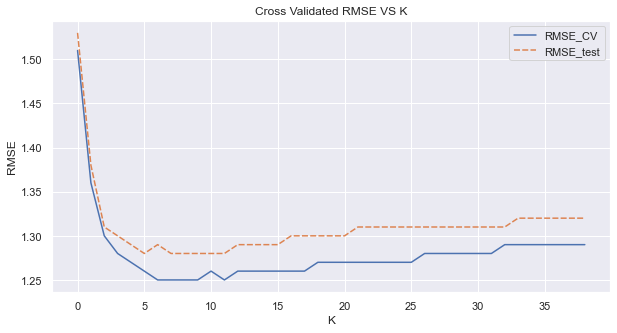

In [56]:
RMSE_CV=[]
RMSE_test = []

k=40

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(y_test - KNN_i.predict(X_test)))))
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 'RMSE_test':np.round(RMSE_test,2), 'K':range(1,k)})

plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k.drop('K', axis=1))
plt.title('Cross Validated RMSE VS K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

As can be seen, the optimal cross validated number of neighbors is 7.

Optimal K:

In [ ]:
optimal_k.loc[np.argmin(optimal_k['RMSE_CV']), 'K']

7

R-Squared for Optimum KNN

In [ ]:
KNN_regression = KNeighborsRegressor(n_neighbors=7)
KNN_regression.fit(X_train, y_train)

KNN_regression.score(X_test, y_test)

0.3539943090380362

RMSE for optimal KNN

In [ ]:
NMSE = cross_val_score(estimator = KNN_regression, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

1.2549

KNN performs about the same as the linear regression model. It took longer to run too.

SVM


In [ ]:
from sklearn.svm import SVR

SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)
y_hat = SVM_regression.predict(X_test)

5 fold CV RMSE for unoptimized SVM

In [ ]:
NMSE = cross_val_score(estimator = SVR(), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

1.1846

R-Squared for unoptimized SVM

In [ ]:
SVM_regression.score(X_test, y_test)

0.4017806806319101

In [ ]:
from sklearn.model_selection import GridSearchCV

my_param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf']} 

GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 , scoring=None)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.4min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.5min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 2.4min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.8min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.6min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  35.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  35.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  35.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  35.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  35.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  35.6s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

This took 2 hours, basically on the dot

Optimized SVM hyperparameters

In [ ]:
grid.best_estimator_

SVR(C=10, gamma=0.1)

R-Squared for optimized SVM

In [ ]:
grid.score(X_test, y_test)

0.46458737398188543

RMSE for optimized SVM

In [ ]:
NMSE = cross_val_score(estimator = SVR(C=10, gamma = 0.1), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

1.1186

This RMSE took 14 minutes

SVM performs better than the linear regression model. The r-squared jumped quite significantly.

### Decision Trees

In [34]:
from sklearn.preprocessing import StandardScaler
df_tree["Levy"] = df_sc["Levy"]
df_tree["Mileage"] = df_sc["Mileage"]

df_tree.head()

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,TARGET
0,1.350339,LEXUS,2010,Jeep,Yes,Hybrid,3.5,-0.027816,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,9.497622
1,0.679116,CHEVROLET,2011,Jeep,No,Petrol,3,-0.027692,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,9.718422
2,-1.114336,HONDA,2006,Hatchback,No,Petrol,1.3,-0.027527,4.0,Variator,Front,04-May,Right-hand drive,Black,2,9.043932
3,0.404285,FORD,2011,Jeep,Yes,Hybrid,2.5,-0.028168,4.0,Automatic,4x4,04-May,Left wheel,White,0,8.190632
4,-0.328600,HONDA,2014,Hatchback,Yes,Petrol,1.3,-0.029760,4.0,Automatic,Front,04-May,Left wheel,Silver,4,9.369564


In [35]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_categorical = ["Manufacturer", "Prod. year", "Category", 
"Leather interior", "Fuel type", "Gear box type", "Drive wheels", "Doors", "Wheel", "Color", 
"Airbags", "Cylinders", "Engine volume"]

enc = OrdinalEncoder()
df_tree[ordinal_categorical]= enc.fit_transform(df_tree[ordinal_categorical])

In [36]:
df_tree = df_tree.dropna()
df_tree.head()

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,TARGET
0,1.350339,31.0,43.0,4.0,1.0,2.0,63.0,-0.027816,5.0,0.0,0.0,1.0,0.0,12.0,12.0,9.497622
1,0.679116,8.0,44.0,4.0,0.0,5.0,56.0,-0.027692,5.0,2.0,0.0,1.0,0.0,1.0,8.0,9.718422
2,-1.114336,21.0,39.0,3.0,0.0,5.0,22.0,-0.027527,3.0,3.0,1.0,1.0,1.0,1.0,2.0,9.043932
3,0.404285,16.0,44.0,4.0,1.0,2.0,46.0,-0.028168,3.0,0.0,0.0,1.0,0.0,14.0,0.0,8.190632
4,-0.328600,21.0,47.0,3.0,1.0,5.0,22.0,-0.029760,3.0,0.0,1.0,1.0,0.0,12.0,4.0,9.369564


In [37]:
y = df_tree['TARGET']
X = df_tree.drop('TARGET', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [45]:
from sklearn.tree import DecisionTreeRegressor
Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
y_hat = Tree_regressor.predict(X_test)

RMSE Decision Tree not Optimized

In [47]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

1.54

In [48]:
Tree_regressor.score(X_test, y_test)

0.07180562703991045

In [49]:
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

RMSE_CV=[]
for alpha in ccp_alphas:
    MSE = -cross_val_score(estimator = DecisionTreeRegressor(random_state=1,ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['RMSE_CV']=RMSE_CV

output.head()

,alpha,RMSE_CV
0,0.000000e+00,1.509596
1,-2.771228e-18,NaN
2,0.000000e+00,1.509596
3,1.154678e-19,1.509596
4,3.464034e-19,1.509596


This took 297 minutes

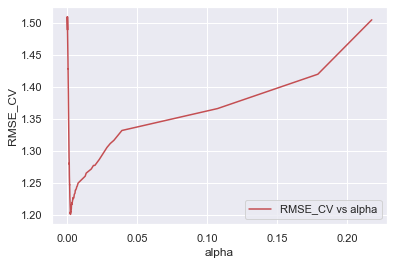

In [50]:
sns.lineplot(x='alpha', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs alpha")
plt.show()

Optimal Alpha for Decision Tree

In [51]:
optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]
optimal_alpha

0.0021892199306298744

In [52]:
optimal_DT = DecisionTreeRegressor(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

RMSE for optimized Decision Tree

In [53]:
MSE_test = round(np.mean(np.square(y_test - y_hat_opt)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

1.26

R-Squared for optimized Decision Tree

In [54]:
optimal_DT.score(X_test, y_test)

0.3762846987950177

In [55]:
dtree= DecisionTreeRegressor(ccp_alpha=optimal_alpha)
dtree.fit(X_train, y_train)
price_hat = dtree.predict(X_test)

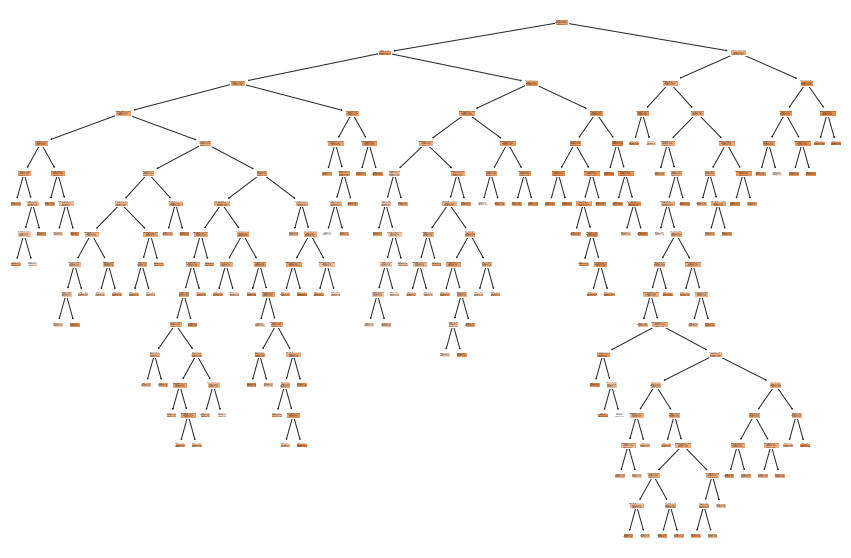

In [56]:
from sklearn import tree

fig = plt.figure(figsize=(15,10))
DT_plot = tree.plot_tree(dtree, feature_names=X_train.columns, filled=True)

This tree is quite bushy and difficult to interpret, but we thought we would include it just to show it off.

The decision tree performed quite a bit better than the linear regression benchmark. It took a long time to optimze though, which isn't ideal.

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

In [48]:
y_hat = RF_regression.predict(X_test)

R-Squared for non optimized Random Forest

In [49]:
np.round(RF_regression.score(X_test, y_test),4)

0.4913

RMSE for non optimized Random Forest

In [50]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

1.14

In [55]:
my_param_grid = {'n_estimators': [10,100,500], 'max_features':['sqrt','log2'], 'max_depth':[5,10,20]}

grid = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=500; total time=   1.9s
[CV] END ...max_depth=5, max_features=sqrt, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1000),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

This had twice as many runs compared to the other optimizations, but it finished in 2 and a half minutes!

Best estimator Hyperparameters for Random Forest

In [56]:
grid.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [57]:
y_hat_optimized = grid.predict(X_test)

R-squared with Optimized Random Forest

In [58]:
np.round(grid.score(X_test, y_test),4)

0.5237

RMSE for optimized Random Forest

In [59]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

1.1

Feature Importance

In [60]:
features = list(X_train.columns)

RF_Regressor = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500, random_state=1000)
RF_Regressor.fit(X_train, y_train)

importance = RF_Regressor.feature_importances_

FIM = pd.DataFrame({'Features': features, 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
11,Doors,0.005788
12,Wheel,0.012199
10,Drive wheels,0.023573
8,Cylinders,0.025069
4,Leather interior,0.034913
3,Category,0.035178
5,Fuel type,0.056756
13,Color,0.060637
1,Manufacturer,0.070229
0,Levy,0.077736


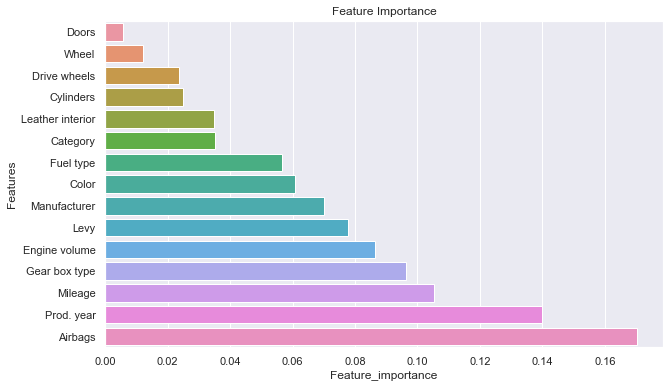

In [62]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

The most important variables are airbags, prod. year, and mileage. Most of these make sense and they are all somewhat related to each other. Newer vehicles have lower mileage, which as we sell usually means a higher sell price, they also more airbags, which are a strongly desired feature for cars.

### Boosting

In [39]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [40]:
AdB_regressor = AdaBoostRegressor(random_state=rand_state)
AdB_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1000)

In [41]:
GBM_regressor = GradientBoostingRegressor(random_state=rand_state, learning_rate=0.1, max_depth=6)
GBM_regressor.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, random_state=1000)

In [42]:
XGB_regressor = XGBRegressor(random_state=rand_state, eta=0.1, max_depth=6)
XGB_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=1000,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_hat_AdB      = AdB_regressor.predict(X_test)
y_hat_GBM      = GBM_regressor.predict(X_test)
y_hat_XGB      = XGB_regressor.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [45]:
np.round(AdB_regressor.score(X_test, y_test),4)

-0.3154

In [46]:
np.round(GBM_regressor.score(X_test, y_test),4)

0.458

In [47]:
np.round(XGB_regressor.score(X_test, y_test),4)

0.4579

As can be seen, the boosting methods do far better than the linear regression model, but worse than the random forest model.

## Conclusion

Linear regression was our benchmark. We got an R-Squared value of .359. The optimized random forest model had an r-squared value of .5237. This is a large improvement to our benchmark, which is a good reason to celebrate. It's also a pretty good value for r-squared, the optimized random forest model explains a little over half of the variation in log car price. This is pretty good! We would recommend this model as the best model to use, it ran the quickest and performed the best by far!